# TWITTER DATA ANALYSIS

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import emoji

In [2]:
maxTweets = 100
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#datascience since:2022-09-01 until:2022-09-08').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.likeCount])

<ipython-input-2-76b0b8f8d3ee>:7: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.likeCount])


In [3]:
tweets_list[:5]

[[datetime.datetime(2022, 9, 7, 23, 59, 19, tzinfo=datetime.timezone.utc),
  1567663838178189313,
  'Gross_sculptor',
  'How to Get AI Artist Grant?\nhttps://t.co/7e1ts3MiMR\n#art #AIart #machinelearning #deeplearning #MLsoGood #artificialintelligence #datascience #iiot #devops #data #code #python #bigdata #MLart #algorithm\n#programmer #pytorch #DataScientist #Analytics #AI #VR #iot #Digitalart #Te…',
  2],
 [datetime.datetime(2022, 9, 7, 23, 57, 48, tzinfo=datetime.timezone.utc),
  1567663455418843137,
  'Synergistic_IT',
  '#DataScience is getting unprecedented attention. So, if you spend some time enhancing your data #skills, you can break into this exciting #career. Check out our blog to learn how you can get started with a #careerindatascience. Learn more: https://t.co/AsdCA7iga6\n#SynergisticIT https://t.co/zqYrKUMhBu',
  0],
 [datetime.datetime(2022, 9, 7, 23, 57, 37, tzinfo=datetime.timezone.utc),
  1567663412208967680,
  'Paula_Piccard',
  'Collaborative machine learning that

In [4]:
#Creating a dataframe
df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_Id', 'Username', 'text','likes'])
df.head()

,datetime,tweet_Id,Username,text,likes
0,2022-09-07 23:59:19+00:00,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2
1,2022-09-07 23:57:48+00:00,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0
2,2022-09-07 23:57:37+00:00,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3
3,2022-09-07 23:56:58+00:00,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2
4,2022-09-07 23:55:14+00:00,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1


In [5]:
df.to_csv('tweet.csv')
data =pd.read_csv('tweet.csv')

In [6]:
data.head()

,Unnamed: 0,datetime,tweet_Id,Username,text,likes
0,0,2022-09-07 23:59:19+00:00,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2
1,1,2022-09-07 23:57:48+00:00,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0
2,2,2022-09-07 23:57:37+00:00,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3
3,3,2022-09-07 23:56:58+00:00,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2
4,4,2022-09-07 23:55:14+00:00,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1


In [7]:
data.columns

Index(['Unnamed: 0', 'datetime', 'tweet_Id', 'Username', 'text', 'likes'], dtype='object')

In [8]:
data = data.drop('Unnamed: 0',axis=1)

In [9]:
data.head()

,datetime,tweet_Id,Username,text,likes
0,2022-09-07 23:59:19+00:00,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2
1,2022-09-07 23:57:48+00:00,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0
2,2022-09-07 23:57:37+00:00,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3
3,2022-09-07 23:56:58+00:00,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2
4,2022-09-07 23:55:14+00:00,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1


In [10]:
data.text[0:10]

0    How to Get AI Artist Grant?\nhttps://t.co/7e1t...
1    #DataScience is getting unprecedented attentio...
2    Collaborative machine learning that preserves ...
3    A3 Size Original Contemporary Abstract̗ Ink Wa...
4    #ai #ml #artificialintelligence #machinelearni...
5    #ai #ml #artificialintelligence #machinelearni...
6    📢Closing Today! \n\nLecturer in #Statistics &a...
7    Understand the concept of #BusinessIntelligenc...
8    Find out how easy it is to raise a number to a...
9    #ml #techniques #data #science #analytics #dat...
Name: text, dtype: object

In [11]:
data.datetime= pd.to_datetime(data.datetime).dt.date

In [12]:
data.shape

(101, 5)

In [13]:
data.head(5)

,datetime,tweet_Id,Username,text,likes
0,2022-09-07,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2
1,2022-09-07,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0
2,2022-09-07,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3
3,2022-09-07,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2
4,2022-09-07,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1


In [14]:
# view the data frame again
data.head()

,datetime,tweet_Id,Username,text,likes
0,2022-09-07,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2
1,2022-09-07,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0
2,2022-09-07,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3
3,2022-09-07,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2
4,2022-09-07,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1


In [15]:
#group counts of tweets by date
dt=data.groupby('datetime').size()
dt

datetime
2022-09-07    101
dtype: int64

In [16]:
tweet = data['text'][:1].values[0]
tweet

'How to Get AI Artist Grant?\nhttps://t.co/7e1ts3MiMR\n#art #AIart #machinelearning #deeplearning #MLsoGood #artificialintelligence #datascience #iiot #devops #data #code #python #bigdata #MLart #algorithm\n#programmer #pytorch #DataScientist #Analytics #AI #VR #iot #Digitalart #Te…'

In [17]:
def cleaner(tweet):
    tweet = tweet.lower()
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub("[^a-z0-9]"," ", tweet) #keeping only english letters
    return tweet
data['clean'] = data['text'].map(lambda x: cleaner(x))
data['clean'] = data['clean'].map(lambda x: x.strip()) #removing white spaces

,datetime,tweet_Id,Username,text,likes,clean
0,2022-09-07,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2,how to get ai artist grant art aiart machinel...
1,2022-09-07,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0,datascience is getting unprecedented attention...
2,2022-09-07,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3,collaborative machine learning that preserves ...
3,2022-09-07,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2,a3 size original contemporary abstract ink wa...
4,2022-09-07,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1,ai ml artificialintelligence machinelearning d...


In [18]:
data.head(20)

,datetime,tweet_Id,Username,text,likes,clean
0,2022-09-07,1567663838178189313,Gross_sculptor,How to Get AI Artist Grant?\nhttps://t.co/7e1t...,2,how to get ai artist grant art aiart machinel...
1,2022-09-07,1567663455418843137,Synergistic_IT,#DataScience is getting unprecedented attentio...,0,datascience is getting unprecedented attention...
2,2022-09-07,1567663412208967680,Paula_Piccard,Collaborative machine learning that preserves ...,3,collaborative machine learning that preserves ...
3,2022-09-07,1567663245565231104,BbBtow,A3 Size Original Contemporary Abstract̗ Ink Wa...,2,a3 size original contemporary abstract ink wa...
4,2022-09-07,1567662809210658816,cuongcz,#ai #ml #artificialintelligence #machinelearni...,1,ai ml artificialintelligence machinelearning d...
5,2022-09-07,1567662806933114880,cuongcz,#ai #ml #artificialintelligence #machinelearni...,0,ai ml artificialintelligence machinelearning d...
6,2022-09-07,1567662348806295553,AustralianData,📢Closing Today! \n\nLecturer in #Statistics &a...,1,closing today lecturer in statistics amp da...
7,2022-09-07,1567661307150667778,exsquaredindia,Understand the concept of #BusinessIntelligenc...,1,understand the concept of businessintelligence...
8,2022-09-07,1567660823354433537,devinsimple,Find out how easy it is to raise a number to a...,3,find out how easy it is to raise a number to a...
9,2022-09-07,1567660822721187840,corpus_news,#ml #techniques #data #science #analytics #dat...,0,ml techniques data science analytics datascien...


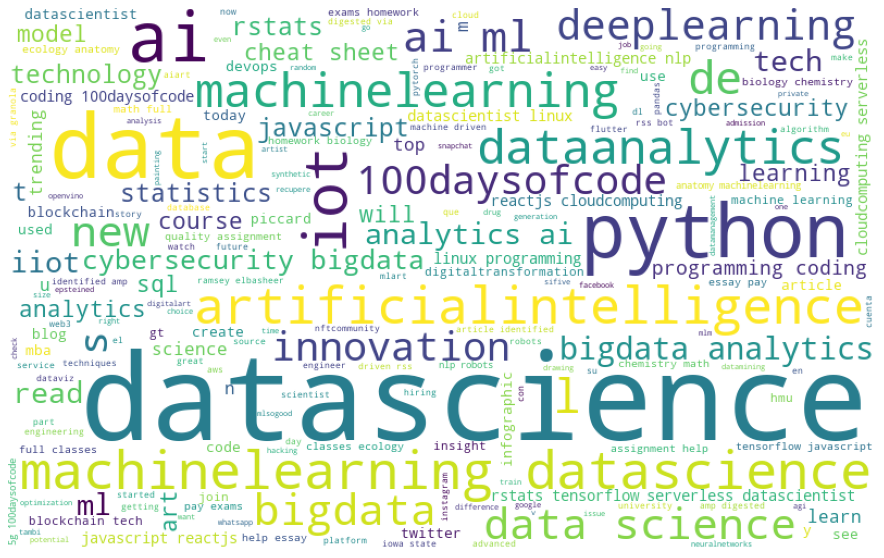

In [19]:
#create a wordcloud to view the most used words in the clean tweets
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['clean']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Finally our code

In [23]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import emoji
from wordcloud import WordCloud

In [24]:
def tweet_analysis(maxTweets,hashtag,start_date,end_date):
    query = f"{hashtag} since:{start_date} until:{end_date}"

    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.likeCount])
    df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_Id', 'Username', 'text','likes'])
    csv_filename = 'csv files/'+hashtag+start_date+' tweet.csv'
    df.to_csv(csv_filename)
    data =pd.read_csv(csv_filename)
    data = data.drop('Unnamed: 0',axis=1)
    data.datetime= pd.to_datetime(data.datetime).dt.date

    def cleaner(tweet):
        tweet = tweet.lower()
        tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
        tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
        tweet = " ".join(tweet.split())
        tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
        tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
        tweet = re.sub("[^a-z0-9]"," ", tweet) #keeping only english letters
        return tweet
    
    data['clean'] = data['text'].map(lambda x: cleaner(x))
    data['clean'] = data['clean'].map(lambda x: x.strip()) #removing white spaces

    #wordcloud
    all_words = ' '.join([text for text in data['clean']])
    wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)
    plt.axis("off")
    filename = 'wordcloud files/'+ hashtag+start_date+'_cloud.png'
    plt.savefig(filename, format="png")
    plt.show()

<ipython-input-24-aeadf6b5f9cb>:8: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.likeCount])


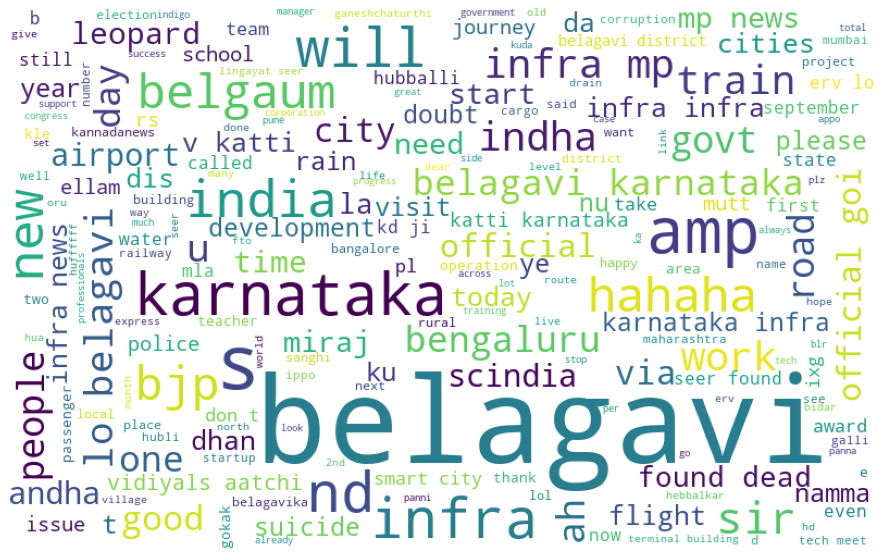

In [27]:
tweet_analysis(50000,'belagavi','2022-09-01','2022-09-06')

### Let's see the tweets of ind vs pak

<ipython-input-24-aeadf6b5f9cb>:8: FutureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.likeCount])


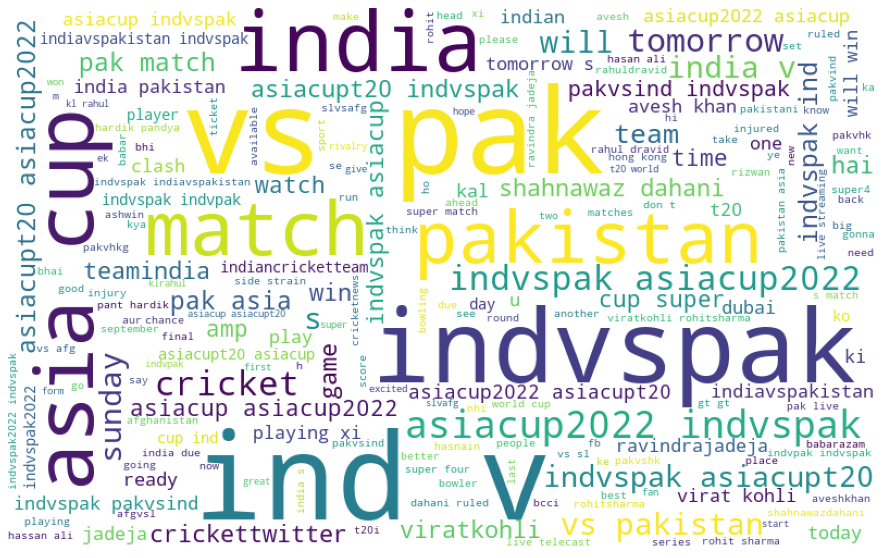

In [28]:
tweet_analysis(50000,'indvspak','2022-09-03','2022-09-04')

# THANK YOU